<a href="https://colab.research.google.com/github/CamdenBert/CSCI290/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-9-15b90b6b3a9a>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(min_vals[0], max_vals[0], resolution),
<ipython-input-9-15b90b6b3a9a>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(min_vals[1], max_vals[1], resolution)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


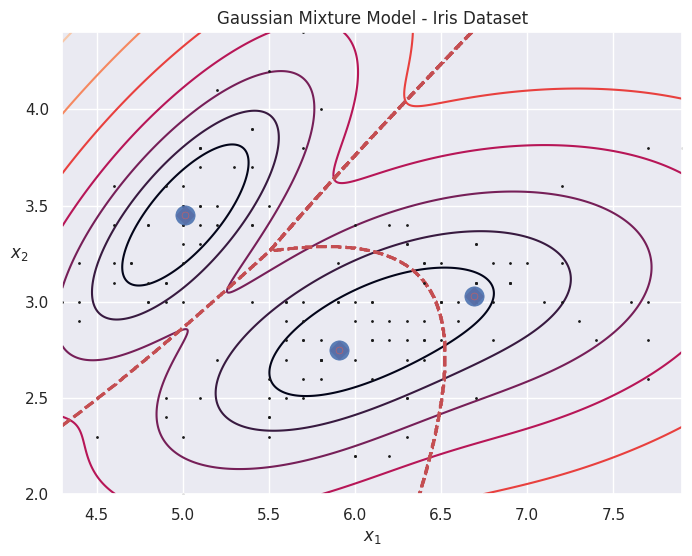

<ipython-input-9-15b90b6b3a9a>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(min_vals[0], max_vals[0], resolution),
<ipython-input-9-15b90b6b3a9a>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(min_vals[1], max_vals[1], resolution)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


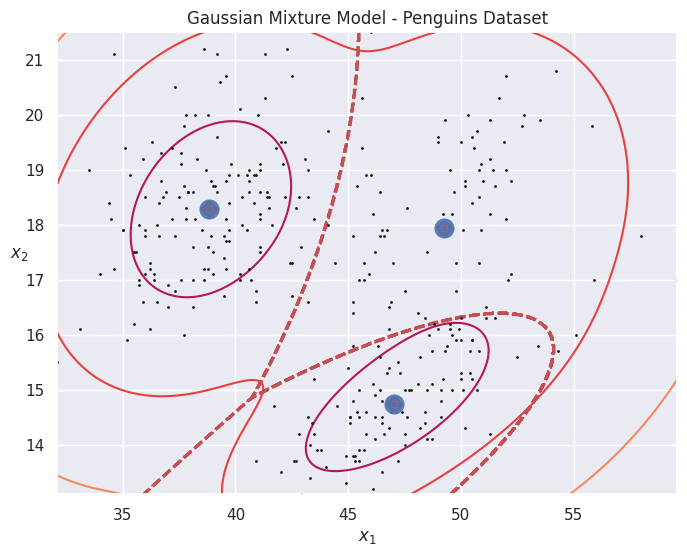

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

sns.set()


def load_data(dataset_name="iris"):
    if dataset_name == "iris":

        iris = load_iris()
        df = pd.DataFrame(iris.data, columns=iris.feature_names)
        feature_names = iris.feature_names
    elif dataset_name == "penguins":

        penguins = sns.load_dataset('penguins')
        penguins.dropna(inplace=True)
        df = penguins[['bill_length_mm', 'bill_depth_mm']]
        feature_names = ['bill_length_mm', 'bill_depth_mm']
    else:
        raise ValueError("Unsupported dataset. Choose 'iris' or 'penguins'.")

    return df, feature_names


def p_centroid(centroids, weights=None, circle_color="b", cross_color="r"):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color=cross_color, s=40, linewidth=10, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", color=circle_color, s=20, linewidth=10, zorder=10, alpha=0.9)


def p_gaussian(cluster, x, resolution=1000, showylabels=True):
    min_vals = x.min()
    max_vals = x.max()

    x1, y1 = np.meshgrid(
        np.linspace(min_vals[0], max_vals[0], resolution),
        np.linspace(min_vals[1], max_vals[1], resolution)
    )


    z = -cluster.score_samples(np.c_[x1.ravel(), y1.ravel()])
    z = z.reshape(x1.shape)


    plt.contour(x1, y1, z, norm=LogNorm(vmin=1, vmax=30), levels=np.logspace(0, 2, 10))


    z = cluster.predict(np.c_[x1.ravel(), y1.ravel()])
    z = z.reshape(x1.shape)
    plt.contour(x1, y1, z, linewidths=2, colors='r', linestyles='dashed')


    x_np = x.values
    plt.plot(x_np[:, 0], x_np[:, 1], 'k.', markersize=2)


    p_centroid(cluster.means_, cluster.weights_)

    plt.xlabel("$x_1$")
    if showylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


def plot_gmm(dataset_name="iris"):

    df, feature_names = load_data(dataset_name)


    if dataset_name == "iris":
        df = df[['sepal length (cm)', 'sepal width (cm)']]


    g_matrix = GaussianMixture(n_components=3, n_init=10)
    g_matrix.fit(df)


    plt.figure(figsize=(8, 6))
    p_gaussian(g_matrix, df)
    plt.title(f"Gaussian Mixture Model - {dataset_name.capitalize()} Dataset")
    plt.show()


plot_gmm('iris')
plot_gmm('penguins')
